# Step1 Getting familiar with the muon objects and nanoaod
In this exercise we will get familiar with the muon objects in an [nanoAOD](https://twiki.cern.ch/twiki/bin/view/CMSPublic/WorkBookNanoAOD) file. We will mostly use the following file, containing simulated Drell–Yan dimuon events generated at NLO !!!!!!<br>
Further information and a list of those variables stored in nanoAOD can be found [here](https://cms-nanoaod-integration.web.cern.ch/integration/master-106X/mc102X_doc.html).<br>
In nanoAOD, data are sored as arrays. 
[Uproot](https://github.com/scikit-hep/uproot#exploring-a-file) will be used to explore the nanoAOD file.


In [22]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
from math import pi

First, lets take a look of the variables stored in NanoAOD. Uproot.open( ) return a ROOTDirectory similar to a python dictionary. Function key( ) prints all the dicinory keywords. The b' ahead of the names is due to ROOT object names having no encoding.

In [2]:
file=uproot.open('~/Downloads/DYJetsToMuMu_M-50_TuneCP5_14TeV-madgraphMLM-pythia8.root')['Events']

In [3]:
file.keys()
#file.values()
#file.show()

[b'run',
 b'luminosityBlock',
 b'event',
 b'HTXS_Higgs_pt',
 b'HTXS_Higgs_y',
 b'HTXS_stage1_1_cat_pTjet25GeV',
 b'HTXS_stage1_1_cat_pTjet30GeV',
 b'HTXS_stage1_1_fine_cat_pTjet25GeV',
 b'HTXS_stage1_1_fine_cat_pTjet30GeV',
 b'HTXS_stage_0',
 b'HTXS_stage_1_pTjet25',
 b'HTXS_stage_1_pTjet30',
 b'HTXS_njets25',
 b'HTXS_njets30',
 b'btagWeight_CSVV2',
 b'btagWeight_DeepCSVB',
 b'CaloMET_phi',
 b'CaloMET_pt',
 b'CaloMET_sumEt',
 b'ChsMET_phi',
 b'ChsMET_pt',
 b'ChsMET_sumEt',
 b'nCorrT1METJet',
 b'CorrT1METJet_area',
 b'CorrT1METJet_eta',
 b'CorrT1METJet_muonSubtrFactor',
 b'CorrT1METJet_phi',
 b'CorrT1METJet_rawPt',
 b'nElectron',
 b'Electron_deltaEtaSC',
 b'Electron_dr03EcalRecHitSumEt',
 b'Electron_dr03HcalDepth1TowerSumEt',
 b'Electron_dr03TkSumPt',
 b'Electron_dr03TkSumPtHEEP',
 b'Electron_dxy',
 b'Electron_dxyErr',
 b'Electron_dz',
 b'Electron_dzErr',
 b'Electron_eInvMinusPInv',
 b'Electron_energyErr',
 b'Electron_eta',
 b'Electron_hoe',
 b'Electron_ip3d',
 b'Electron_jetPtRelv2',
 

# Step2 print and plot some muon objects 
We can print different objects such as transeverse momentum($p_T$ pt), pseudorapidity(eta $\eta$) and azimuthal angle(phi $\phi$) and apply criteria $p_T$, $\eta$ $\phi$ using uproot.<br>
First lets print pt eta phi of reconstructed muon 

In [50]:
a=file.array(['HLTriggerFinalPath'])
print(type(a)) 
print(len(a))
#len(muon_eta)

<class 'numpy.ndarray'>
140277


In [13]:
muon_pt,muon_eta,muon_phi=file.arrays(["Muon_pt", "Muon_eta", "Muon_phi"],outputtype=tuple)

In [54]:
print('muon_pt=', muon_pt, '\n',
      'muon_eta=', muon_eta, '\n',
      'muon_phi=', muon_phi)

muon_pt= [[28.913345] [] [52.494305 40.533558 4.394153] ... [54.169434 51.1125] [50.2459 38.491104] [108.90053 52.06664 3.3444448]] 
 muon_eta= [[0.38287354] [] [0.57702637 0.4537964 -0.8736572] ... [-0.49017334 -1.6101074] [-0.125 -0.770874] [0.7303467 -0.050605774 0.90319824]] 
 muon_phi= [[-0.614624] [] [2.459961 -0.72839355 1.8188477] ... [-0.65563965 -2.065918] [0.7928467 -2.1796875] [1.6374512 0.67126465 -0.63830566]]


Then lets apply criteria such as pt>20 GeV and |eta|<2.4.

In [58]:
masking=(muon_pt>20)&(abs(muon_eta)<2.4)
masking

<JaggedArray [[True] [] [True True False] ... [True True] [True True] [True True False]] at 0x7fdb910d5310>

As you can see above, by performing masking, a jagged array of bool values is created.
Then using the sytax array[masking], we keep only the varible that is true in the masking array

In [60]:
print('muon_pt=', muon_pt[masking], '\n',
      'muon_eta=', muon_eta[masking], '\n',
      'muon_phi=', muon_phi[masking])

muon_pt= [[28.913345] [] [52.494305 40.533558] ... [54.169434 51.1125] [50.2459 38.491104] [108.90053 52.06664]] 
 muon_eta= [[0.38287354] [] [0.57702637 0.4537964] ... [-0.49017334 -1.6101074] [-0.125 -0.770874] [0.7303467 -0.050605774]] 
 muon_phi= [[-0.614624] [] [2.459961 -0.72839355] ... [-0.65563965 -2.065918] [0.7928467 -2.1796875] [1.6374512 0.67126465]]


Then lets plot pt of reconstructed muon and reconstructed muon with pt>20 GeV and |eta|<2.4, note that we can use flatten() to reduce the jagged 2 dimension array to 1 dimension.

In [62]:
muon_pt_masked=muon_pt[masking]
muon_pt_flat=muon_pt.flatten()
muon_pt_masked_flat=muon_pt_masked.flatten()

Text(0, 0.5, 'Events')

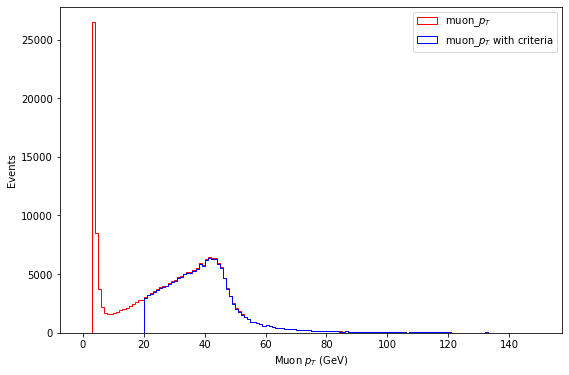

In [63]:
plt.figure(figsize=(9,6))
plt.hist(muon_pt_flat, bins=150, range=[0,150], histtype='step', color='red', label='muon_$p_T$')
plt.hist(muon_pt_masked_flat, bins=150, range=[0,150], histtype='step', color='blue', label='muon_$p_T$ with criteria')
plt.legend()
plt.xlabel(r'Muon $p_T$ (GeV)')
plt.ylabel('Events')

Question 1: Using the syntax above, plot the main kinematic observables for the following objects and selections (only the first few events):
- all final-state muons in the reco::GenParticle collection
- all final-state muons in the reco::GenParticle collection with pt > 20 GeV and |η| < 2.4
- all final-state muons in the reco::GenParticle collection with pt > 20 GeV and |η| < 2.4, and not coming from a hadron or τ decay
<br>

Hint (GenPart_statusFlags 
gen status flags stored bitwise, bits are: 0 : isPrompt, 1 : isDecayedLeptonHadron, 2 : isTauDecayProduct, 3 : isPromptTauDecayProduct, 4 : isDirectTauDecayProduct, 5 : isDirectPromptTauDecayProduct, 6 : isDirectHadronDecayProduct, 7 : isHardProcess, 8 : fromHardProcess, 9 : isHardProcessTauDecayProduct, 10 : isDirectHardProcessTauDecayProduct, 11 : fromHardProcessBeforeFSR, 12 : isFirstCopy, 13 : isLastCopy, 14 : isLastCopyBeforeFSR,

GenPart_status	Particle status. 1=stable)

Text(0, 0.5, 'Events')

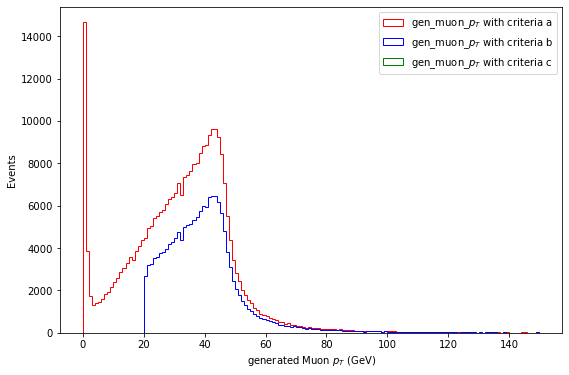

In [20]:
genpart_status, genpart_statusflags, genpart_pdgid, genpart_pt, genpart_eta, genpart_phi=file.arrays(["GenPart_status", "GenPart_statusFlags", "GenPart_pdgId", "GenPart_pt", "GenPart_eta", "GenPart_phi"], outputtype=tuple)
masking_one=(abs(genpart_pdgid)==13)& (genpart_status==1)
masking_two=(abs(genpart_pdgid)==13)& (genpart_status==1)&(genpart_pt>20)&(abs(genpart_eta)<2.4)
masking_three=masking_two&(genpart_statusflags==0)
plt.figure(figsize=(9,6))
plt.hist(genpart_pt[masking_one].flatten(), bins=150, range=[0,150], histtype='step', color='red', label='gen_muon_$p_T$ with criteria a')
plt.hist(genpart_pt[masking_two].flatten(), bins=150, range=[0,150], histtype='step', color='blue', label='gen_muon_$p_T$ with criteria b')
plt.hist(genpart_pt[masking_three].flatten(), bins=150, range=[0,150], histtype='step', color='green', label='gen_muon_$p_T$ with criteria c')
plt.legend()
plt.xlabel(r'generated Muon $p_T$ (GeV)')
plt.ylabel('Events')

# Step 3 Gen matching
Gen matching information for muon is already stored in Muon_genPartIdx, which is matched on status=1 muon using particle flow algorithm. 
Lets print the Moun_genPartIdx. Note that -1 means cannot matched to generated particles.

In [15]:
muon_genpartidx=file.array("Muon_genPartIdx")
muon_genpartidx

<JaggedArray [[8] [] [14 16 -1] ... [13 12] [10 8] [10 9 -1]] at 0x7fcf0827a490>

We can also do a matching ourselves using deltaR method, in deltaR method, we need to make sure the delta phi is between pi and -pi. Below defines a deltaR function
&Delta;R = (&Delta;&eta;<sup>2</sup> + &Delta;&phi;<sup>2</sup>)<sup>1/2</sup> <br>
Note that &Delta;&phi; is between &pi; to -&pi;.

In [26]:
def deltaR(genetas, eta, genphis, phi):
    return np.sqrt((genetas-eta)**2+((genphis-phi+pi)%(2*pi)-pi)**2)

In [30]:
muon_genpartidx_deltar=[]

for genetas, genphis, etas, phis in zip(genpart_eta, genpart_phi, muon_eta, muon_phi):
  idx=[]
  for eta, phi in zip(etas, phis):
    deltar=deltaR(genetas, eta, genphis, phi)
    if deltar.min()<0.1:
        idx.append(deltar.argmin())
    else:
        idx.append(-1)
  muon_genpartidx_deltar.append(idx)

print(muon_genpartidx_deltar)
#for geneta, genphi, in zip

[[6], [], [8, 9, -1], [], [7, -1], [8], [7, -1], [11], [], [8, -1, -1], [7, -1, -1], [8], [6, 7], [8, 9], [7, 6, -1], [10, 9], [7], [-1, -1, -1], [5, 7], [4, 5], [], [8], [10, -1], [8, 9], [8, 9], [4, 5], [8, -1], [8, 7], [9, 10, -1], [6, 7, -1], [5], [8, 7], [5], [7], [14], [9, -1], [-1], [10, -1], [7], [5, -1, -1, -1, -1], [12], [8, 7], [], [8], [7, 5, -1], [12, 11], [11], [6], [6, 7], [5, 6], [6], [5, 7, 7], [7], [9], [6], [5, -1], [10, 9], [8, 9], [7, 8], [7, 8], [6, 7], [8], [13, 12], [8, 7, -1], [6, 7, -1], [5, 7, -1], [], [6, 7], [5], [8, 9], [11, 10], [6, 7], [5, -1], [9], [6], [6, 7], [10, 5], [9, 8], [12, 11], [12, 9], [8], [9, 8, -1], [8, 7], [9, 10, 10], [9, 10], [], [], [10], [8], [7, -1, -1], [6, 5], [8, 9], [7, 6], [14, 15], [], [14, 15], [6, 7, -1], [], [8], [6, 7], [9], [8, 9], [], [6, 7, -1], [7, 9], [7], [7, 8], [], [8, -1], [6, 7], [9], [7], [8], [6, 5], [], [11, 9, -1], [8, 9, -1], [10, 11], [6, -1], [7], [7, 6], [7], [12, 11, 6], [], [8], [10, 11], [9, 8], [10, 11

# Step 4: Trigger matching